# Task 5

In [16]:
import os
import pandas as pd

path_dataframes = os.path.join("..", "dataset", "dataframes")
file_path = os.path.join(path_dataframes, "train_data_aggregated_split.pkl")
df_train_aggregated= pd.read_pickle(file_path)

df_train_aggregated.head(5)

,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,...,P7_time_line_integral,P7_time_min,P7_time_max,P7_freq_peak_value,P7_freq_peak_freq,P7_freq_sum_power_spectrum,P7_freq_std_power_spectrum,P7_freq_rms_freq,Case,Window_ID
0,1,Normal,100,100,100,100,No,No,No,No,...,784.906580,0.017144,5.013518,5020.028779,65.000000,26930.154869,501.116403,11.633031,1,1
1,1,Normal,100,100,100,100,No,No,No,No,...,787.373792,-0.002641,5.016796,5610.686996,65.000000,26048.487157,508.501184,11.441019,1,2
2,1,Normal,100,100,100,100,No,No,No,No,...,789.525599,-0.003006,5.017115,5325.708422,64.837905,26122.284330,501.853078,11.428535,1,3
3,1,Normal,100,100,100,100,No,No,No,No,...,785.214600,-0.002262,4.994830,5071.356039,65.000000,27028.792007,505.424186,11.654316,2,1
4,1,Normal,100,100,100,100,No,No,No,No,...,787.175441,-0.003732,4.999298,5609.065086,65.000000,26860.719421,520.657365,11.618024,2,2


In [17]:
df_fault = df_train_aggregated[df_train_aggregated["Condition"] == "Fault"]
columns=["Condition", "Spacecraft", "BP1", "BP2", "BP3", "BP4", "BP5", "BP6", "BP7", "BV1"]
df_fault = df_fault.drop(columns=columns)
df_fault.head(10)

,SV1,SV2,SV3,SV4,P1_time_mean,P1_time_median,P1_time_p25,P1_time_p75,P1_time_variance,P1_time_line_integral,...,P7_time_line_integral,P7_time_min,P7_time_max,P7_freq_peak_value,P7_freq_peak_freq,P7_freq_sum_power_spectrum,P7_freq_std_power_spectrum,P7_freq_rms_freq,Case,Window_ID
315,0,100,100,100,1.990987,1.965806,1.928698,2.062674,0.063283,794.372086,...,787.443747,0.078116,5.022674,3435.995059,65.000000,21376.410718,374.586686,10.364321,106,1
316,0,100,100,100,1.991161,1.960991,1.928880,2.062837,0.063853,794.423918,...,788.450749,-0.000695,5.024541,3604.771208,65.000000,20678.566891,371.613295,10.193743,106,2
317,0,100,100,100,1.991315,1.961103,1.929212,2.062337,0.063707,796.482167,...,790.664881,-0.000892,5.024811,3375.005753,64.837905,20697.085020,371.103696,10.172779,106,3
318,25,100,100,100,1.984399,1.959150,1.892100,2.062495,0.094906,791.732325,...,785.129491,0.016613,5.131036,4874.267686,65.000000,26956.236895,494.105584,11.638663,107,1
319,25,100,100,100,1.984909,1.957863,1.893444,2.062784,0.095468,791.913697,...,787.337991,-0.002065,5.133735,5417.301463,65.000000,25812.616693,495.252441,11.389102,107,2
320,25,100,100,100,1.985138,1.958316,1.893502,2.062783,0.095253,793.994670,...,789.568374,-0.002196,5.134264,5155.496473,64.837905,25861.005634,489.644458,11.371237,107,3
321,50,100,100,100,1.984351,1.961723,1.891558,2.062679,0.094895,791.712980,...,785.008032,-0.001186,5.058240,4813.061142,65.000000,27203.232782,491.878077,11.691863,108,1
322,50,100,100,100,1.984997,1.957863,1.894173,2.063048,0.095325,791.947922,...,786.385660,-0.001819,5.060748,5224.693647,65.000000,26033.651981,486.340632,11.437761,108,2
323,50,100,100,100,1.985227,1.958311,1.894571,2.062896,0.095110,794.028907,...,788.832466,-0.002278,5.061238,5012.725871,64.837905,25995.150981,481.464664,11.400691,108,3
324,75,100,100,100,1.984365,1.960820,1.891337,2.060440,0.094843,791.718275,...,785.043980,0.026341,5.026410,4991.457941,65.000000,27018.162965,499.964902,11.652024,109,1


Creiamo i 4 dataframe per i 4 regressori

In [18]:
# 1. Creazione delle colonne fault_position e valve_opening
def find_fault_position(row):
    # Restituisce 1..4 a seconda di quale colonna SVi è diversa da 100
    for i, col in enumerate(["SV1", "SV2", "SV3", "SV4"], start=1):
        if row[col] != 100:
            return i
    return None  # Se nessuna colonna è diversa da 100, ma dovrebbe esserci sempre una valvola aperta

def find_valve_opening(row):
    # Restituisce il valore diverso da 100 trovato in SV1..SV4
    for col in ["SV1", "SV2", "SV3", "SV4"]:
        if row[col] != 100:
            return row[col]
    return 100  # Se per qualche motivo nessuna colonna è diversa da 100

# Applica le funzioni a df_fault
df_fault = df_fault.copy()  # Evita SettingWithCopyWarning
df_fault["fault_location"] = df_fault.apply(find_fault_position, axis=1)
df_fault["valve_opening"] = df_fault.apply(find_valve_opening, axis=1)

df_fault

,SV1,SV2,SV3,SV4,P1_time_mean,P1_time_median,P1_time_p25,P1_time_p75,P1_time_variance,P1_time_line_integral,...,P7_time_max,P7_freq_peak_value,P7_freq_peak_freq,P7_freq_sum_power_spectrum,P7_freq_std_power_spectrum,P7_freq_rms_freq,Case,Window_ID,fault_location,valve_opening
315,0,100,100,100,1.990987,1.965806,1.928698,2.062674,0.063283,794.372086,...,5.022674,3435.995059,65.000000,21376.410718,374.586686,10.364321,106,1,1,0.0
316,0,100,100,100,1.991161,1.960991,1.928880,2.062837,0.063853,794.423918,...,5.024541,3604.771208,65.000000,20678.566891,371.613295,10.193743,106,2,1,0.0
317,0,100,100,100,1.991315,1.961103,1.929212,2.062337,0.063707,796.482167,...,5.024811,3375.005753,64.837905,20697.085020,371.103696,10.172779,106,3,1,0.0
318,25,100,100,100,1.984399,1.959150,1.892100,2.062495,0.094906,791.732325,...,5.131036,4874.267686,65.000000,26956.236895,494.105584,11.638663,107,1,1,25.0
319,25,100,100,100,1.984909,1.957863,1.893444,2.062784,0.095468,791.913697,...,5.133735,5417.301463,65.000000,25812.616693,495.252441,11.389102,107,2,1,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,100,100,100,50,1.985553,1.955966,1.891897,2.064000,0.083071,792.170238,...,5.174075,4428.388858,65.000000,29505.058182,438.427224,12.176478,152,2,4,50.0
455,100,100,100,50,1.985790,1.956166,1.892271,2.063901,0.082892,794.251096,...,5.174530,4264.424338,64.837905,29608.118093,436.309995,12.167193,152,3,4,50.0
456,100,100,100,75,1.984505,1.957238,1.889842,2.065357,0.084678,791.775880,...,5.040553,3875.431887,65.000000,30088.215456,426.466957,12.296221,153,1,4,75.0
457,100,100,100,75,1.985251,1.956104,1.892300,2.065623,0.084936,792.049016,...,5.043793,3654.687048,65.000000,29605.247340,411.243910,12.197134,153,2,4,75.0


## Regressore

Definisco X (le feature) e y (il target)

In [19]:
X = df_fault.drop(columns=["SV1", "SV2", "SV3", "SV4", "fault_location", "valve_opening", "Case", "Window_ID"])
y = df_fault['valve_opening']

Applico SelectKBest con f_regression per selezionare le migliori n feature

Le top 20 feature per la regressione (SV1) sono:
['P1_time_mean', 'P1_time_p25', 'P1_time_variance', 'P1_time_min', 'P1_time_max', 'P1_freq_peak_value', 'P1_freq_sum_power_spectrum', 'P1_freq_std_power_spectrum', 'P1_freq_rms_freq', 'P2_time_p25', 'P2_time_variance', 'P2_freq_sum_power_spectrum', 'P2_freq_std_power_spectrum', 'P2_freq_rms_freq', 'P5_time_mean', 'P5_time_p25', 'P5_time_variance', 'P5_freq_sum_power_spectrum', 'P5_freq_std_power_spectrum', 'P5_freq_rms_freq']


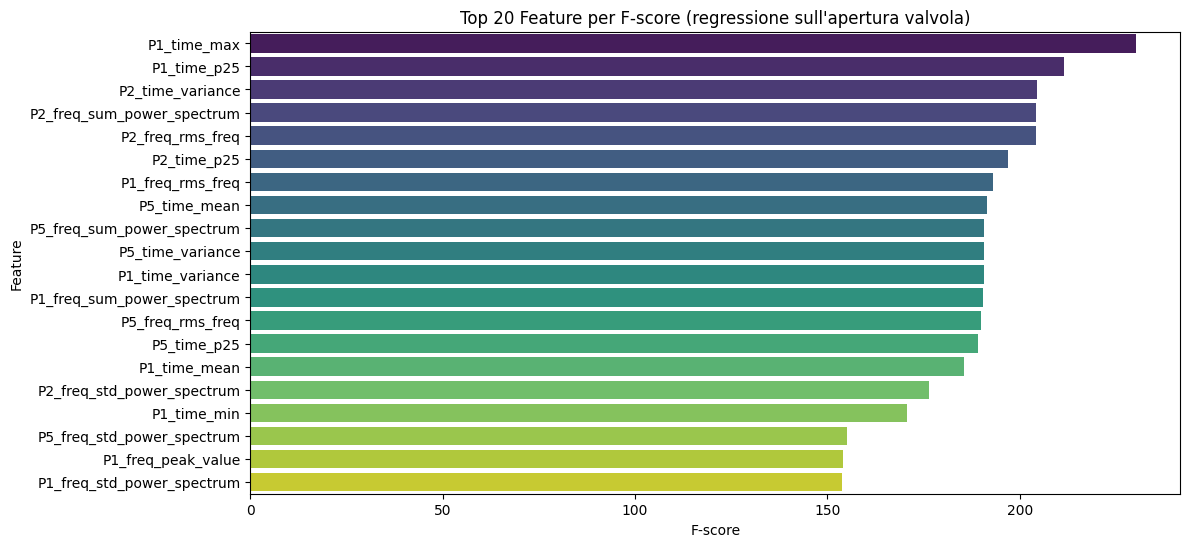

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression

n = 20  # top n feature
selector = SelectKBest(score_func=f_regression, k=n)
X_selected = selector.fit_transform(X, y)

# Ottieni i nomi delle feature selezionate
selected_features = X.columns[selector.get_support()]
print("Le top {} feature per la regressione (SV1) sono:".format(n))
print(selected_features.tolist())

# 3. Visualizza i punteggi F delle top n feature in un istogramma
# Creiamo una Series con gli F-score per tutte le feature
f_scores = pd.Series(selector.scores_, index=X.columns)
# Estraiamo i punteggi solo per le feature selezionate e li ordiniamo in ordine decrescente
topn_f_scores = f_scores[selected_features].sort_values(ascending=False)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=topn_f_scores.values, y=topn_f_scores.index, hue=topn_f_scores.index, palette='viridis', dodge=False)
plt.xlabel("F-score")
plt.ylabel("Feature")
plt.title("Top {} Feature per F-score (regressione sull'apertura valvola)".format(n))
plt.show()

Applico il Random Forest Regressor

--- XGBoost Regressor_SV1 ---
MAE: 7.692933543050552
MSE: 144.0367146847459
RMSE: 12.001529681034244
R^2 Score: 0.8205409228890795

--- ExtraTrees Regressor_SV1 ---
MAE: 6.077586206896552
MSE: 96.16163793103448
RMSE: 9.80620405309998
R^2 Score: 0.8801897222222222

--- RandomForest Regressor_SV1 ---
MAE: 8.64655172413793
MSE: 136.08836206896552
RMSE: 11.665691666976524
R^2 Score: 0.8304439814814815



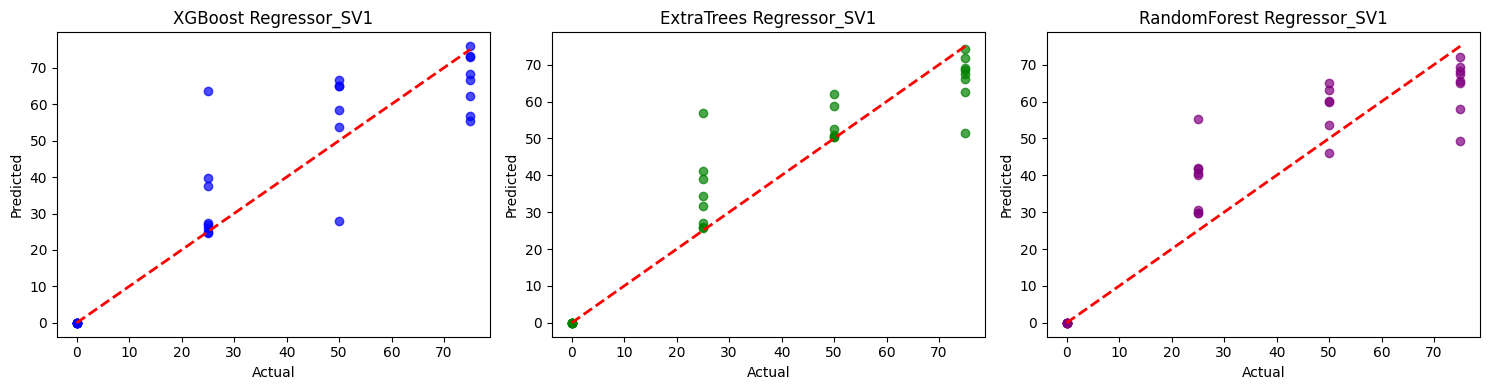

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Preparazione del dataset ---
X = df_fault[selected_features]

# Suddivisione in training (80%) e test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 1. Gradient Boosting (XGBoost) ---
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

# --- 2. ExtraTreesRegressor ---
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
et_reg = ExtraTreesRegressor(random_state=42)
et_reg.fit(X_train, y_train)
y_pred_et = et_reg.predict(X_test)

# --- 3. RandomForestRegressor (al posto dell'SVR) ---
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# --- Funzione per stampare le metriche di regressione ---
def print_regression_metrics(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"--- {model_name} ---")
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R^2 Score:", r2)
    print("")

print_regression_metrics(y_test, y_pred_xgb, "XGBoost Regressor_SV1")
print_regression_metrics(y_test, y_pred_et, "ExtraTrees Regressor_SV1")
print_regression_metrics(y_test, y_pred_rf, "RandomForest Regressor_SV1")

# --- Visualizzazione dei risultati ---
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("XGBoost Regressor_SV1")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1,3,2)
plt.scatter(y_test, y_pred_et, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("ExtraTrees Regressor_SV1")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_rf, color='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("RandomForest Regressor_SV1")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()

## Predizioni sui dati di test e confronto finale

Importo il dataframe con i dati di test non etichettati

In [22]:
path_dataframes = os.path.join("..", "dataset", "dataframes")
file_path = os.path.join(path_dataframes, "test_data_split_with_condition_and_anomaly_fault_location.pkl")
test_data_aggregated_split= pd.read_pickle(file_path)

test_data_aggregated_split.head(5)

,Spacecraft,P1_time_mean,P1_time_median,P1_time_p25,P1_time_p75,P1_time_variance,P1_time_line_integral,P1_time_min,P1_time_max,P1_freq_peak_value,...,P7_freq_peak_value,P7_freq_peak_freq,P7_freq_sum_power_spectrum,P7_freq_std_power_spectrum,P7_freq_rms_freq,Case,Window_ID,Condition,anomaly_location,fault_location
0,1,1.984074,1.968528,1.897964,2.057444,0.089958,791.609870,0.599879,4.409431,1187.765081,...,3639.567068,62.50000,25240.991187,404.252030,11.262289,178,1,2,2,0
1,1,1.984509,1.963438,1.898697,2.057745,0.090624,791.774258,0.561861,4.411653,1202.301221,...,3945.055858,62.50000,23656.785685,391.929474,10.903133,178,2,2,2,0
2,1,1.984681,1.963766,1.899070,2.057667,0.090409,793.837928,0.561754,4.411926,1228.619720,...,3979.709606,62.34414,23695.311811,390.011746,10.884694,178,3,2,2,0
3,1,1.984472,1.960340,1.892148,2.062852,0.093266,791.761654,0.479821,4.100935,1256.382067,...,4950.370311,65.00000,27089.997640,499.897599,11.667504,179,1,3,0,2
4,1,1.985048,1.958879,1.894102,2.063106,0.093737,791.969210,0.453900,4.103057,1253.972941,...,5538.603524,65.00000,25996.746576,504.627198,11.429651,179,2,3,0,2


Filtriamo solo i Fault

In [23]:
df_fault = test_data_aggregated_split[test_data_aggregated_split['Condition'] == 3].copy()

Predizioni vere e proprie

In [32]:
# Seleziona le feature da df_fault
X = df_fault[selected_features]

# Effettua le predizioni utilizzando il modello et_reg / rf_reg /xgb_reg
y_pred = et_reg.predict(X)

# Crea un nuovo DataFrame con le colonne "Case" e "Predicted"
df_predictions = pd.DataFrame({
    'Case': df_fault['Case'],
    'Predicted': y_pred
})

# Raggruppa per "Case" e calcola la media delle predizioni
df_predictions = df_predictions.groupby('Case')['Predicted'].mean().reset_index()

# Arrotonda la colonna "Predicted" a intero
df_predictions['Predicted'] = df_predictions['Predicted'].round().astype(int)

# Carica il file answer_competition.csv
df_answer = pd.read_csv("../dataset/test/answer_competition.csv")  # Assicurati che il percorso sia corretto

# Supponiamo che df_answer contenga la colonna "ID" che corrisponde a "Case" e la colonna "task5" con il ground truth.
# Unisci df_case con df_answer basandoti su "Case" e "ID"
df_joined = pd.merge(df_predictions, df_answer[['ID', 'task5']], left_on="Case", right_on="ID", how="left")

# Se non ti serve la colonna "ID", eliminala
df_joined.drop(columns=['ID'], inplace=True)

# Rinomina la colonna "task5" in "Expected" (o come preferisci)
df_joined.rename(columns={'task5': 'Expected'}, inplace=True)

df_joined


,Case,Predicted,Expected
0,179,28,22
1,181,58,76
2,188,29,5
3,190,50,46
4,202,62,44
5,212,60,70
6,214,37,24
